In [1]:
import pandas as pd
import nltk
import numpy as np
import textrank
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import pickle

In [3]:
col_labels = ['Date','AppID','AppName','Lang','1', '2', '3', 'Author','Stars','Title','Review','Reply','Device','DeviceType','Tags','Updated']

In [4]:
df = pd.read_csv('reviews_googleplay_1507788606.csv', 
                  skiprows=4, engine='python', names = col_labels, index_col=False,
                  error_bad_lines=True
                 )

In [5]:
df.head(3)

Date                  AppID  \
0  \t2017-10-11  com.wachanga.babycare   
1  \t2017-10-11  com.wachanga.babycare   
2  \t2017-10-11  com.wachanga.babycare   

                                     AppName Lang   1   2   3         Author  \
0  Baby Breastfeeding Tracker. Newborn Diary   pt NaN NaN NaN  Renato Morais   
1  Baby Breastfeeding Tracker. Newborn Diary   de NaN NaN NaN            NaN   
2  Baby Breastfeeding Tracker. Newborn Diary   pt NaN NaN NaN            NaN   

   Stars Title                                             Review Reply  \
0      5   NaN                                          Muito bom   NaN   
1      4   NaN  Scheint eine gute App zu sein. Sehr √ºbersichtl...   NaN   
2      5   NaN  Perfeito. Consigo controlar todos os dados imp...   NaN   

   Device  DeviceType Tags  Updated  
0     NaN         NaN  NaN      NaN  
1     NaN         NaN  NaN      NaN  
2     NaN         NaN  NaN      NaN

In [6]:
df_1 = df.drop(['AppID','AppName', '1', '2', '3', 'Device','DeviceType','Tags','Updated'], axis =1)

#col_labels = ['Date',,'Lang', 'Author','Stars','Title','Review','Reply',]

In [659]:
df_1.tail(3)

Date Lang           Author  Stars               Title  \
3507  \t2015-07-08   ru  –°–≤—è–∑–Ω–æ–π –°–≤—è–∑–Ω–æ–π      3                 NaN   
3508  \t2015-07-07   ru   Maxim Kolpakov      5  –£–¥–æ–±–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ   
3509  \t2015-07-04   ru    –†–æ–º–∞–Ω –ú—É—Ä–∞—Ç–æ–≤      5                 NaN   

                                                 Review  \
3507  –í—Ä–µ–º—è –ø–æ—Å–ª–µ –∫–æ—Ä–º–ª–µ–Ω–∏—è –∏ –≤—Å–µ–≥–æ –æ—Å—Ç–∞–ª—å–Ω–æ–≥–æ –ø–æ–∫–∞–∑...   
3508  –ñ–µ–Ω–∞ –∫–æ—Ä–º–∏—Ç –¥–æ—á–∫—É, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Ñ–∏–∫—Å–∏—Ä—É—è –≤ —ç—Ç–æ–º...   
3509                                   –°—É–ø—Ä—É–≥–∞ –¥–æ–≤–æ–ª—å–Ω–∞   

                                                  Reply  
3507  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –≤–µ—Ä–Ω—ã–π –ª–∏...  
3508                                                NaN  
3509                                  –°–ø–∞—Å–∏–±–æ –∑–∞ –æ—Ç–∑—ã–≤!

In [7]:
df_1.shape

(3510, 7)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 7 columns):
Date      3510 non-null object
Lang      3510 non-null object
Author    2949 non-null object
Stars     3510 non-null int64
Title     197 non-null object
Review    3510 non-null object
Reply     533 non-null object
dtypes: int64(1), object(6)
memory usage: 192.0+ KB


In [ ]:
#plt.plot(x)

In [214]:
x = df_1.groupby('Lang').Review.count().sort_values(ascending = False)
#sns.distplot(x)

In [215]:
x_Lang = pd.DataFrame(x)

In [216]:
x_Lang.style.bar()

In [ ]:
#chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]


In [622]:
Ru_review = df_1[(df_1.Lang == 'ru')]
Ru_review.shape

(1081, 7)

In [218]:
df.Review[2]

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

In [ ]:
## trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930

In [623]:
from yandex_translate import YandexTranslate
translate = YandexTranslate('trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930')
print('Languages:', translate.langs)
print('Translate directions:', translate.directions)
print('Detect language:', translate.detect('–ü—Ä–∏–≤–µ—Ç, –º–∏—Ä!'))
print('Translate:', translate.translate('–ü—Ä–∏–≤–µ—Ç, –º–∏—Ä!', 'ru-en'))  # or just 'en'

Languages: {'bg', 'et', 'fi', 'ru', 'ca', 'hy', 'it', 'lv', 'be', 'az', 'sv', 'uk', 'el', 'sr', 'tr', 'lt', 'hr', 'hu', 'sq', 'es', 'da', 'en', 'mk', 'no', 'sk', 'nl', 'de', 'pt', 'sl', 'cs', 'pl', 'fr', 'ro'}
Translate directions: ['az-ru', 'be-bg', 'be-cs', 'be-de', 'be-en', 'be-es', 'be-fr', 'be-it', 'be-pl', 'be-ro', 'be-ru', 'be-sr', 'be-tr', 'bg-be', 'bg-ru', 'bg-uk', 'ca-en', 'ca-ru', 'cs-be', 'cs-en', 'cs-ru', 'cs-uk', 'da-en', 'da-ru', 'de-be', 'de-en', 'de-es', 'de-fr', 'de-it', 'de-ru', 'de-tr', 'de-uk', 'el-en', 'el-ru', 'en-be', 'en-ca', 'en-cs', 'en-da', 'en-de', 'en-el', 'en-es', 'en-et', 'en-fi', 'en-fr', 'en-hu', 'en-it', 'en-lt', 'en-lv', 'en-mk', 'en-nl', 'en-no', 'en-pt', 'en-ru', 'en-sk', 'en-sl', 'en-sq', 'en-sv', 'en-tr', 'en-uk', 'es-be', 'es-de', 'es-en', 'es-ru', 'es-uk', 'et-en', 'et-ru', 'fi-en', 'fi-ru', 'fr-be', 'fr-de', 'fr-en', 'fr-ru', 'fr-uk', 'hr-ru', 'hu-en', 'hu-ru', 'hy-ru', 'it-be', 'it-de', 'it-en', 'it-ru', 'it-uk', 'lt-en', 'lt-ru', 'lv-en', 'l

In [220]:
text = df.Review[2]
text

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

## –ü–µ—Ä–µ–≤–µ–¥–µ–º 10 –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å–ª–æ–≤–∞—Ä—è —Å —Ç–æ–ø 4-—Ö —è–∑—ã–∫–æ–≤ 

### –†—É—Å—Å–∫–∏–π 

In [488]:
m = []
for i in russian_df_total.index:
    m.append(i)
print (len(m))

1081


In [444]:
q_russian={}
for i, elem in enumerate(russ_total):
    q_russian[m[i]] = elem

## Pickle !!!
https://docs.python.org/3/library/pickle.html#examples

In [445]:
with open('q_russian.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(q_russian, f, pickle.HIGHEST_PROTOCOL)

In [307]:
''' with open('q_russian.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    russian_data = pickle.load(f)
'''

In [ ]:
# —Å–æ–∑–¥–∞–¥–∏–º dataframe –≥–¥–µ –±—É–¥–µ—Ç –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –æ—Ç–∑—ã–≤ –∏ –µ–≥–æ –ø–µ—Ä–µ–≤–æ–¥ —Å —è–Ω–¥–µ–∫—Å–∞ 

In [419]:
russian_df_total = df_1[df_1['Lang'] == 'ru']
len (russian_df_total)

1081

In [424]:
russian_df_1 = df_1[df_1['Lang'] == 'ru']['Review'][0:51]
russian_df_2 = df_1[df_1['Lang'] == 'ru']['Review'][51:101]
russian_df_3 = df_1[df_1['Lang'] == 'ru']['Review'][101:151]
russian_df_4 = df_1[df_1['Lang'] == 'ru']['Review'][151:201]
russian_df_5 = df_1[df_1['Lang'] == 'ru']['Review'][201:251]
russian_df_6 = df_1[df_1['Lang'] == 'ru']['Review'][251:301]
russian_df_7 = df_1[df_1['Lang'] == 'ru']['Review'][301:351]
russian_df_8 = df_1[df_1['Lang'] == 'ru']['Review'][351:401]
russian_df_9 = df_1[df_1['Lang'] == 'ru']['Review'][401:451]
russian_df_10 = df_1[df_1['Lang'] == 'ru']['Review'][451:501]
russian_df_11 = df_1[df_1['Lang'] == 'ru']['Review'][501:551]
russian_df_12 = df_1[df_1['Lang'] == 'ru']['Review'][551:601]
russian_df_13 = df_1[df_1['Lang'] == 'ru']['Review'][601:651]
russian_df_14 = df_1[df_1['Lang'] == 'ru']['Review'][651:701]
russian_df_15 = df_1[df_1['Lang'] == 'ru']['Review'][701:751]
russian_df_16 = df_1[df_1['Lang'] == 'ru']['Review'][751:801]
russian_df_17 = df_1[df_1['Lang'] == 'ru']['Review'][801:851]
russian_df_18 = df_1[df_1['Lang'] == 'ru']['Review'][851:901]
russian_df_19 = df_1[df_1['Lang'] == 'ru']['Review'][901:951]
russian_df_20 = df_1[df_1['Lang'] == 'ru']['Review'][951:1001]
russian_df_21 = df_1[df_1['Lang'] == 'ru']['Review'][1001:1051]
russian_df_22 = df_1[df_1['Lang'] == 'ru']['Review'][1051:]

In [425]:
russ_1 = translate.translate(russian_df_1, 'ru-en')['text']

In [360]:
russ_2 = translate.translate(russian_df_2, 'ru-en')['text']

In [361]:
russ_3 = translate.translate(russian_df_3, 'ru-en')['text']

In [362]:
russ_4 = translate.translate(russian_df_4, 'ru-en')['text']

In [363]:
russ_5 = translate.translate(russian_df_5, 'ru-en')['text']

In [364]:
russ_6 = translate.translate(russian_df_6, 'ru-en')['text']

In [365]:
russ_7 = translate.translate(russian_df_7, 'ru-en')['text']

In [366]:
russ_8 = translate.translate(russian_df_8, 'ru-en')['text']

In [367]:
russ_9 = translate.translate(russian_df_9, 'ru-en')['text']

In [368]:
russ_10 = translate.translate(russian_df_10, 'ru-en')['text']

In [369]:
russ_11 = translate.translate(russian_df_11, 'ru-en')['text']

In [370]:
russ_12 = translate.translate(russian_df_12, 'ru-en')['text']

In [371]:
russ_13 = translate.translate(russian_df_13, 'ru-en')['text']

In [372]:
russ_14 = translate.translate(russian_df_14, 'ru-en')['text']

In [373]:
russ_15 = translate.translate(russian_df_15, 'ru-en')['text']

In [374]:
russ_16 = translate.translate(russian_df_16, 'ru-en')['text']

In [375]:
russ_17 = translate.translate(russian_df_17, 'ru-en')['text']

In [376]:
russ_18 = translate.translate(russian_df_18, 'ru-en')['text']

In [377]:
russ_19 = translate.translate(russian_df_19, 'ru-en')['text']

In [378]:
russ_20 = translate.translate(russian_df_20, 'ru-en')['text']

In [379]:
russ_21 = translate.translate(russian_df_21, 'ru-en')['text']

In [380]:
russ_22 = translate.translate(russian_df_22, 'ru-en')['text']

In [491]:
russ_total_lists = russ_1 + russ_2 + russ_3 + russ_4 + russ_5\
                + russ_6 + russ_7 + russ_8 + russ_9 + russ_10\
                + russ_11 + russ_12 + russ_13 + russ_14 + russ_15\
                + russ_16+ russ_17 +russ_18 +russ_19+ russ_20 +russ_21 + russ_22

## –ø–µ—Ä–µ–≤–æ–¥–∏–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Ç—Ä 

In [662]:
russ_total_lists_lower=[i.lower() for i in russ_total_lists]

In [665]:
with open('russ_total_lists_lower.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(russ_total_lists_lower, f, pickle.HIGHEST_PROTOCOL)

In [9]:
with open('russ_total_lists_lower.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    russ_total_lists_lower = pickle.load(f)

In [10]:
len (russ_total_lists_lower)

1081

In [533]:
#russian_se = pd.Series(russian['text']) 

In [489]:
#str_total_text_ru = ''.join(russ_total)

In [ ]:
'''
—Å–æ—Ö—Ä–∞–Ω–∏—Ç—å —Ç–µ–∫—Å—Ç –≤ —Å–ø–∏—Å–æ–∫ 

tokenizer=lambda x: x
pickle

https://docs.python.org/3/library/pickle.html#examples
https://docs.python.org/3/library/pickle.html

1 –≤–µ—Å—å —Ç–µ–∫—Å—Ç - text rank –≤ –∫–∞–∂–¥–æ–º –æ—Ç–∑—ã–≤–µ 
2 –ø–æ–¥–∞–µ–º –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä—É –Ω–∞ –≤—Ö–æ–¥ —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤ - –≥–¥–µ –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç —Å–ø–∏—Å–æ–∫ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ 1-–≥–æ –æ—Ç–∑—ã–≤–∞
3 –∑–∞–ø—É—Å–∫–∞–µ–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ 
4 –ø–æ–ª—É—á–∞–µ–º –∫–ª–∞—Å—Ç–µ—Ä—ã —Å –≥—Ä—É–ø–ø–æ–π –æ—Ç–∑—ã–≤–æ–≤ - —Å–º–æ—Ç—Ä–∏–º –∏—Ö –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é 


2 –≤–µ–∫—Ç–æ—Ä–∏–∑–∏–∏—Ä—É–µ–º –∫–∞–∂–¥—ã–π —Ç–µ–∫—Å—Ç - —Å—Ç—Ä–æ–∫–∏ –æ—Ç–∑—ã–≤—ã, –∫–æ–ª–æ–Ω–∫–∏ - –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏–∑ text rank 
Vectorizer 
fit tranform (–µ—Å—Ç—å –ø–æ–¥—Å—á–µ—Ç —Å–ª–æ–≤) - –ø–æ–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤, –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ —É–∫–∞–∑–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é, 
–∫–æ—Ç–æ—Ä–∞—è –±–µ—Ä–µ—Ç –Ω–∞ –≤—Ö–æ–¥ 
tokenizer - –¥–æ–ª–∂–µ–Ω –≤–∑—è—Ç—å —Å–ø–∏—Å–æ–∫ –∏ –æ—Ç–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ (–≤–º–µ—Å—Ç–æ –≤–∑—è—Ç—å —Å–ø–ª–æ—à–Ω–æ–π —Ç–µ–∫—Å—Ç –∏ –æ—Ç–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤)

—Å–æ—Å—Ç–∞–≤–ª—è–µ–º —Å–ø–∏—Å–æ–∫ –∏–∑ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤

# –ö–∞–∂–¥—ã–π —Ç–µ–∫—Å—Ç —ç—Ç–æ —Ç–æ—á–∫–∞ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ - —ç—Ç–æ –Ω–∞–ª–∏—á–∏–µ –∫–ª—é—á–µ–≤–æ–≥–æ —Å–ª–æ–≤–∞ 
# –£ –Ω–∞—Å 4 –∫–ª–∞—Å—Ç–µ—Ä–∞. –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Ç–µ–∫—Å—Ç  

# –¥–æ —Ç–µ–∫—Å—Ç —Ä–∞–Ω–∫–∞ –ø—Ä–∏–≤–µ—Å—Ç–∏ –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä—ë - ok 
# –∏–∑ —Å–ø–∏—Å–∫–∞ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –≤—ã–∫–∏–Ω—É—Ç—å —Å—Ç–æ–ø—Å–ª–æ–≤–∞ –ø–æ—Å–ª–µ —Ç–µ–∫—Å—Ç —Ä–∞–Ω–∫ - –∑–∞–±—Ä–∞—Ç—å –≤—Å–µ, –∫—Ä–æ–º–µ —Å—Ç–æ–ø—Å–ª–æ–≤–∞ (stop —Å–ª–æ–≤ ) - ok
# nltk.stopwords("english")
# dic - –∫–ª—é—á - –Ω–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞, –∑–Ω–∞—á–µ–Ω–∏—è  - —Ç–µ–∫—Å—Ç—ã 
# importa - [11.11.17, 14:58:40] Max Ionov: collections.defaultdict(list)
# l = collections.defaultdict(list)

# 1 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç - ok 
# –∫–∞–∫ —Å–µ–π—á–∞—Å 
# 2 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç - –±–µ–∑ –≤—ã–¥–µ–ª–µ–Ω–∏—è –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤  - ok

'''

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [12]:
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [13]:
len(stop_words)

167

In [16]:
key_phrases = []
for i in russ_total_lists_lower:
    y = [b for b in textrank.extract_key_phrases(i) if b not in stop_words]
    key_phrases.append(y)

In [17]:
len(key_phrases)

1081

In [754]:
count = 0
for i in key_phrases:
    if 'app' in i:
        count +=1
print (count)

78


In [755]:
key_phrases[0:5]

[['everything', 'harmonious', 'much', 'thank'],
 ['application', 'example', 'information', 'attention', 'sleep'],
 ['beginning', 'completion', 'dream', 'walk'],
 ['simple'],
 ['super']]

In [613]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥–∏—Å–∫–µ –≤ —Ñ–æ—Ä–º–∞—Ç–µ python —Å–ø–∏—Å–∫–∞ 

In [756]:
with open('key_phrases.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(key_phrases, f, pickle.HIGHEST_PROTOCOL)

In [18]:
with open('key_phrases.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    key_phrases = pickle.load(f)

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 1 Text Rank

##  –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è 

In [19]:
import sklearn.feature_extraction.text
vctr = sklearn.feature_extraction.text.CountVectorizer(tokenizer = lambda key_phrases: key_phrases, preprocessor=lambda key_phrases: key_phrases)

# tokenizer = lambda key_phrases: key_phrases - –¥–æ–ª–∂–µ–Ω –≤–∑—è—Ç—å —Å–ø–∏—Å–æ–∫ –∏ –æ—Ç–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ 
#(–≤–º–µ—Å—Ç–æ –≤–∑—è—Ç—å —Å–ø–ª–æ—à–Ω–æ–π —Ç–µ–∫—Å—Ç –∏ –æ—Ç–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤)
# preprocessor=lambda x: x - –¥–æ–ª–∂–µ–Ω –≤–∑—è—Ç—å —Å–ø–∏—Å–æ–∫ –∏ –æ—Ç–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫

In [673]:
# list(' '.join(i) for i in key_phrases[:5])

In [20]:
X_train = vctr.fit_transform(key_phrases) # —Å–∫–∞—Ä–º–ª–∏–≤–∞–µ–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ 

In [21]:
# –ü–æ—á–µ–º—É 782 - –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞, 1081 - –Ω–∞–±–æ—Ä –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ 
X_train.shape

(1081, 777)

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è 

In [22]:
from sklearn.cluster import KMeans

In [608]:
# –í—ã–±–∏—Ä–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ 

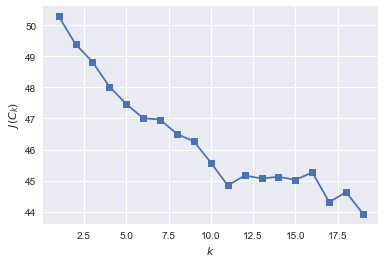

In [23]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$') # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ 
plt.ylabel('$J(C_k)$'); # —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–æ–∏–¥–æ–≤ 

In [45]:
clf_kmeans = KMeans(n_clusters=10)

# –º–æ–∂–Ω–æ –≤—ã–¥–∞—Ç—å 3 —Å–∞–º—ã—Ö —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞ –∏ –æ–±—â–∏–µ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –º–µ–∂–¥—É –Ω–∏–º–∏ 
# 3 - –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –±–ª–∏–∑–∫–∏—Ö –∫ —Ü–µ–Ω—Ç—Ä—É - –∏–∑ –Ω–∏—Ö –≤—ã–±—Ä–∞—Ç—å —Ç–æ–ø 3 –ø–µ—Ä–µ—Å–µ–∫–∞—é—â–∏–µ—Å—è –æ—Ç–∑—ã–≤—ã, –∞ –ø–æ—Ç–æ–º –≤—Å–µ 
#https://stackoverflow.com/questions/39766593/get-element-closest-to-cluster-centroid
#https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn
# –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –≤—ã–¥–µ–ª–∏—Ç—å 3-5 –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –±–ª–∏–∑–∫–∏—Ö —Ç–µ–∫—Å—Ç–∞ 
# –∏–∑ –Ω–∏—Ö –≤—ã–±—Ä–∞—Ç—å —Ç–æ–ø 3 –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–∫–∞—é—Ç—Å—è
# –µ—Å–ª–∏ –Ω–µ—Ç, —Ç–æ–ø 3-5 –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è –∏–∑ –≤—Å–µ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ 


In [799]:
# –ü–µ—Ä–µ–¥–∞–µ–º –≤ –º–æ–¥–µ–ª—å –≤—Å–µ –¥–∞–Ω–Ω—ã–µ 

In [46]:
clusters_kmeans = clf_kmeans.fit_predict(X_train)

In [47]:
clusters_kmeans.shape

(1081,)

In [48]:
kmeans.labels_

array([ 6, 17,  0, ...,  6, 17,  0], dtype=int32)

## –ü–æ—á–µ–º—É 19 —Ü–µ–Ω—Ç—Ä–æ–∏–¥–æ–≤? 

In [49]:
centroids = kmeans.cluster_centers_

In [50]:
print (centroids)

[[ 0.          0.00208768  0.         ...,  0.          0.00208768  0.        ]
 [ 0.          0.          0.00671141 ...,  0.          0.          0.00671141]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.01538462  0.          0.         ...,  0.01538462  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [51]:
centroids.shape

(19, 777)

In [52]:
X_train.shape

(1081, 777)

https://stackoverflow.com/questions/45234336/value-at-kmeans-cluster-centers-in-sklearn-kmeans

In [877]:
closest, _ = pairwise_distances_argmin_min(centroids, X_train)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2078 while Y.shape[1] == 777

In [ ]:
#d = km.transform(X)[:, j] - –ø—Ä–∏–º–µ—Ä 
#d = clusters_kmeans.transform(X_train)[:, j] #Transform X to a cluster-distance space.

In [828]:
from sklearn.metrics import pairwise_distances_argmin_min
#X = np.random.randn(10, 4)
#km = KMeans(n_clusters=2).fit(X)

In [846]:
# https://stackoverflow.com/questions/44041347/sklearn-get-distance-from-point-to-nearest-cluster

from sklearn.metrics.pairwise import pairwise_distances

dist_matrix = pairwise_distances(X_train)
# –Ω–∞–¥–æ –≤–∑—è—Ç—å —Ç–æ—á–∫–∏ —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞, –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –µ–≥–æ –∫–∞–∫ Y) 


In [847]:
dist_matrix

array([[ 0.        ,  3.        ,  2.82842712, ...,  2.23606798,
         2.44948974,  2.23606798],
       [ 3.        ,  0.        ,  3.        , ...,  2.82842712,
         2.23606798,  2.44948974],
       [ 2.82842712,  3.        ,  0.        , ...,  2.64575131,
         2.44948974,  2.23606798],
       ..., 
       [ 2.23606798,  2.82842712,  2.64575131, ...,  0.        ,
         2.23606798,  2.        ],
       [ 2.44948974,  2.23606798,  2.44948974, ...,  2.23606798,
         0.        ,  1.        ],
       [ 2.23606798,  2.44948974,  2.23606798, ...,  2.        ,
         1.        ,  0.        ]])

In [ ]:
# —Ü–µ–Ω—Ç—Ä–æ–∏–¥ - —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –≤ –æ–¥–Ω–æ–º –∫–ª–∞—Å—Å–µ 
# —Ä–∞–∑–Ω–∏—Ü–∞ - –º–µ–∂–¥—É —Ü–µ–Ω—Ç—Ä–æ–∏–¥–æ–º –∏ –¥–ª–∏–Ω–æ–π —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π - —ç—Ç–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —É–º–µ–Ω—å—à–µ–Ω–∏—é 


In [855]:
clusters_kmeans[0:5]

array([1, 3, 0, 0, 0], dtype=int32)

In [858]:
print (X_train[0:10])

  (0, 247)	1
  (0, 315)	1
  (0, 424)	1
  (0, 680)	1
  (1, 44)	1
  (1, 52)	1
  (1, 250)	1
  (1, 347)	1
  (1, 626)	1
  (2, 77)	1
  (2, 155)	1
  (2, 220)	1
  (2, 748)	1
  (3, 622)	1
  (4, 664)	1
  (6, 161)	1
  (7, 345)	1
  (7, 731)	1
  (8, 305)	1
  (8, 622)	1


In [860]:
key_phrases[0:10]

[['everything', 'harmonious', 'much', 'thank'],
 ['application', 'example', 'information', 'attention', 'sleep'],
 ['beginning', 'completion', 'dream', 'walk'],
 ['simple'],
 ['super'],
 [],
 ['convenient'],
 ['utility', 'inexperienced'],
 ['graphs', 'simple'],
 []]

In [861]:
for point in key_phrases:
    distances = []
    for cluster in clusters_kmeans:
        distance = dist_matrix[point, cluster].min()  # Single linkage - —á—Ç–æ –∑–Ω–∞—á–∏—Ç single? 
        distances.append(distance)
    print("The cluster for {} is {}".format(point, cluster))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
for point in unclustered_points:
    distances = []
    for cluster in clusters:
        distance = dist_matrix[point, cluster].min()  # Single linkage
        distances.append(distance)
    print("The cluster for {} is {}".format(point, cluster)

In [ ]:
'''
closest, _ = pairwise_distances_argmin_min(clusters_kmeans.cluster_centers_, X_train)
closest
'''

In [ ]:
''' 
https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn

>>> from sklearn.metrics import pairwise_distances_argmin_min
>>> X = np.random.randn(10, 4)
>>> km = KMeans(n_clusters=2).fit(X)
>>> closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
>>> closest
array([0, 8])

https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr

If you have the distance to center values in a list, you can use sort.


results = [(distance_to_center, (x, y)), (distance_to_center, (x, y)), ...]
results.sort()
# get closest 50
closest_fifty = results[:50]



http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

'''

In [781]:
from collections import defaultdict

In [764]:
# 3 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç - Rake -
# –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ —Å–ª–æ–≤–∞—Ä—é –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ -–ø–æ—Ç–æ–º 

In [816]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å - –Ω–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ —ç—Ç–æ –∫–ª—é—á, –∞ –∑–Ω–∞—á–µ–Ω–∏–µ - —ç—Ç–æ —Ç–µ–∫—Å—Ç (–æ—Ç–∑—ã–≤), –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—É 
dict_cl = defaultdict(list)
for i, elem in enumerate(clusters_kmeans):
    dict_cl[elem].append(russ_total_lists_lower[i])

In [817]:
len(dict_cl)

11

In [818]:
dict_cl[10]

['very simple and easy, i poolboys*ÔºÅ',
 "cons, haven't really noticed very easy in principle.",
 'very easy and simple',
 'very convenient and easy. thank you.',
 'easy to use. i liked it.',
 'easy to use and understand',
 'very easy and intuitive program',
 'making it easy for me maintenance mode)',
 'easy to use and understand all',
 'very easy to use program!!!',
 'i liked it! easy and fun to use!',
 'very easy to use and understand',
 'simple, easy, free!',
 'an easy and convenient application',
 'i really liked this app. very easy to use.']

In [832]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å - –Ω–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞ —ç—Ç–æ –∫–ª—é—á, –∞ –∑–Ω–∞—á–µ–Ω–∏–µ - —ç—Ç–æ —Ç–µ–∫—Å—Ç (–æ—Ç–∑—ã–≤), –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—É 
dict_kp = defaultdict(list)
for i, elem in enumerate(clusters_kmeans):
    dict_kp[elem].append(key_phrases[i])

In [838]:
dict_kp[10][0]

['separate button',
 'necessary',
 'possible',
 'current',
 'upgrade',
 'opinion',
 'useful',
 'default',
 'program feeding',
 'opportunity',
 'feeding']

In [ ]:
# —Å–¥–µ–ª–∞—Ç—å —Ç–æ–ø 3 - idf 
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ 

## –û–ø—Ä–µ–¥–µ–ª–∏–º –±–ª–∏–∂–∞–π—à–∏–µ —Ç–æ—á–∫–∏ –∫ —Ü–µ–Ω—Ç—Ä–æ–∏–¥–∞–º

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2 –ë–µ–∑ –≤—ã–¥–µ–ª–µ–Ω–∏—è –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ RANK 

In [822]:
import sklearn.feature_extraction.text
vctr1 = sklearn.feature_extraction.text.CountVectorizer()

In [823]:
X_train1 = vctr1.fit_transform(russ_total_lists_lower) # —Å–∫–∞—Ä–º–ª–∏–≤–∞–µ–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ 

In [824]:
X_train1.shape

(1081, 2078)

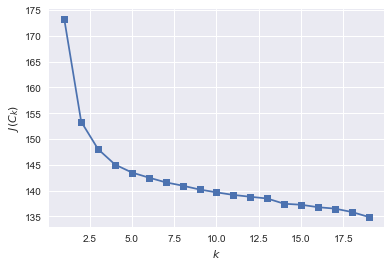

In [825]:
inertia1 = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train1)
    inertia1.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia1, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [826]:
clf_kmeans1 = KMeans(n_clusters=12)

In [827]:
clusters_kmeans1 = clf_kmeans1.fit_predict(X_train1)

## –ò–¥–µ–∏ 

In [ ]:
# —Å—Ä–∞–≤–Ω–∏—Ç—å —Å –æ–±—ã—á–Ω—ã–º IDF - –ø–æ—Å—á–∏—Ç–∞—Ç—å - –≤—ã—è–≤–∏—Ç—å —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ —Ç–µ–º—ã –∏ –∫–∞–∫ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è - story impact, –∞ –ø–æ—Ç–æ–º –≥—Ä—É–ø–ø–∏—Ä—É–µ–º –∏—Ö 

# –ª–∞—Ç–µ–Ω—Ç–Ω–∞—è –º–æ–¥–µ–ª—å - –¥–ª—è –ø–æ–∏—Å–∫–∞ —Å—Ö–æ–∂–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤ !!! 

# –≥—É–≥–ª –¥–ª—è –ª–∞—Ç–∏–Ω—Å–∫–∏—Ö —è–∑—ã–∫–æ–≤ 

# –ø–æ—Å–ª–µ textrank –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å rake –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç
# –æ–±–æ–≥–∞—Ç–∏—Ç—å —Å–ª–æ–≤–∞—Ä—å - word net –∏–ª–∏ word2vec - (–∑–∞ —Å—á–µ—Ç –∫—Ä–∞—É–ª–∏–Ω–≥–∞ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ - —Ç–æ–ª—å–∫–æ –¥–ª—è —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö - NLTK - –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä)
# —Å—Ä–∞–≤–Ω–∏—Ç—å text rank –∏ –º–µ—à–æ–∫ —Å–ª–æ–≤ –æ–±—ã—á–Ω—ã–π 

## –ü–æ—Ä—Ç—É–≥–∞–ª—å—Å–∫–∏–π 

In [227]:
portugalian_df = df_1[df_1['Lang'] == 'pt'][:50]

In [228]:
portugalian_df_translate = portugalian_df['Review']

In [229]:
portugalian = translate.translate(portugalian_df_translate, 'pt-en')

In [230]:
portugalian_se = pd.Series(portugalian['text']) 

In [231]:
portugalian_df['English'] = portugalian_se

In [248]:
portugalian_df.head(5)

Date Lang          Author  Stars Title  \
0   \t2017-10-11   pt   Renato Morais      5   NaN   
2   \t2017-10-11   pt             NaN      5   NaN   
5   \t2017-10-11   pt  Larissa Campos      4   NaN   
7   \t2017-10-10   pt             NaN      5   NaN   
10  \t2017-10-10   pt             NaN      5   NaN   

                                               Review Reply  \
0                                           Muito bom   NaN   
2   Perfeito. Consigo controlar todos os dados imp...   NaN   
5   Troquei de celular e perdi todos os registros ...   NaN   
7   Muito bom consigo amamentar minha bebe nas hor...   NaN   
10  Me ajuda muito no controle de mamadas e fralda...   NaN   

                                              English  
0                                           Very good  
2   I switched cell phone and I lost all records o...  
5                                           Very good  
7   I loved it, helps me a lot, to me organize and...  
10                    Very nice application I love it

## –ò—Å–ø–∞–Ω—Å–∫–∏–π

In [233]:
spanish_df = df_1[df_1['Lang'] == 'es'][:50]

In [234]:
spanish_df_translate = spanish_df['Review']

In [235]:
spanish = translate.translate(spanish_df_translate, 'es-en')

In [236]:
spanish_se = pd.Series(spanish['text']) 

In [237]:
spanish_df['English'] = spanish_se

In [238]:
spanish_df.head() # –ø–æ—á–µ–º—É –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç ???

Date Lang          Author  Stars Title  \
4   \t2017-10-11   es             NaN      5   NaN   
13  \t2017-10-10   es             NaN      5   NaN   
19  \t2017-10-10   es  cyntiahartmann      5   NaN   
48  \t2017-10-08   es  Sandra Vallejo      5   NaN   
51  \t2017-10-07   es     Yohana Sosa      4   NaN   

                                               Review Reply  \
4                                           Excelente   NaN   
13                                         Muy buena!   NaN   
19                                           Muy √∫til   NaN   
48  Muy √∫til. Acabo de tener un beb√© y me viene fe...   NaN   
51  Para saber sus horarios y crear una rutina con...   NaN   

                                              English  
4   To find out your schedule and create a routine...  
13  The app has many functions, but you need to ha...  
19                                       Very useful!  
48  How do I make a backup of my data saved in thi...  
51                                                NaN

## –ù–µ–º–µ—Ü–∫–∏–π

In [239]:
german_df = df_1[df_1['Lang'] == 'de'][:50]

In [240]:
german_df_translate = german_df['Review']

In [241]:
german = translate.translate(german_df_translate, 'de-en')

In [242]:
german_se = pd.Series(german['text']) 

In [243]:
german_df['English'] = german_se

In [244]:
german_df.head()

Date Lang             Author  Stars Title  \
1   \t2017-10-11   de                NaN      4   NaN   
9   \t2017-10-10   de                NaN      4   NaN   
24  \t2017-10-09   de     Jenny L√∂hndorf      4   NaN   
25  \t2017-10-09   de  Francesca Barbaro      5   NaN   
66  \t2017-10-07   de    Eva-Maria M√§√üig      5   NaN   

                                               Review Reply  \
1   Scheint eine gute App zu sein. Sehr √ºbersichtl...   NaN   
9   Alles super, klasse App f√ºr alles Wichtige. Di...   NaN   
24  App, die alles hat, was man braucht. Stilltime...   NaN   
25  Finde die App super...vergesse n√§mlich oft wan...   NaN   
66  Ich finde die App sehr gut. Vor allem weil man...   NaN   

                                              English  
1   Everything was great, great App for everything...  
9                    Super App canüëçneed with all you!  
24  App has all the Fubktionieren, you need to kee...  
25  Great App that is easy to handle and a good Ov...  
66                                                NaN

## –°–æ–µ–¥–∏–Ω—è–µ–º dataframes 

In [245]:
frames = [russian_df, portugalian_df, spanish_df, german_df]

In [246]:
result = pd.concat(frames)

In [247]:
result

Date Lang                 Author  Stars Title  \
3    \t2017-10-11   ru           Eva Lollipop      5   NaN   
11   \t2017-10-10   ru         –ò—Ä–∏–Ω–∞ –§–∞—Ç—É—Ä–æ–≤–∞      3   NaN   
12   \t2017-10-10   ru             –ê–Ω–Ω–∞ –†–æ–º–∞—Å      4   NaN   
15   \t2017-10-10   ru  –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ê—Ä—Ç–µ–º–µ–Ω–∫–æ–≤–∞      5   NaN   
16   \t2017-10-10   ru          –ï–ª–µ–Ω–∞ –ö–∞–¥—Ä–æ–≤–∞      5   NaN   
26   \t2017-10-09   ru         Anna Babashina      4   NaN   
27   \t2017-10-09   ru              –ò–Ω–Ω–∞ –ë–æ—Ä—â      5   NaN   
28   \t2017-10-09   ru             –ê–ª–∏—Å–∞ –Ø–Ω—É—à      5   NaN   
29   \t2017-10-09   ru         –≠–ª–∏–∑–∞ –î–æ—Ä–æ—Ö–æ–≤–∞      5   NaN   
38   \t2017-10-08   ru                Ali Ali      5   NaN   
42   \t2017-10-08   ru                    NaN      4   NaN   
43   \t2017-10-08   ru       –õ—ñ–ª—ñ—è –û–∑–µ—Ä–∞–Ω—Å—å–∫–∞      4   NaN   
47   \t2017-10-08   ru     –î–∏–Ω–∞—Ä–∞ –•–∞–º–∏–¥—É–ª–ª–∏–Ω–∞      5   NaN   
49   \t2017-10-08   ru      –ê–Ω–∞—Å—Ç–∞—Å–∏—è –ò–≤–∞–Ω–æ–≤–∞      5   NaN   
58   \t2017-10-07   ru          –ò—Ä–∏–Ω–∞ –ê–∑—è–º–æ–≤–∞      5   NaN   
62   \t2017-10-07   ru   –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ö—É–±—ã—â–µ–Ω–∫–æ      4   NaN   
67   \t2017-10-07   ru      –û–ö–°–ê–ù–ê –î–æ—Ä–æ–Ω–∏—á–µ–≤–∞      5   NaN   
68   \t2017-10-07   ru         Mary Demyanova      5   NaN   
74   \t2017-10-06   ru   Kamelia Rahmetdinova      5   NaN   
75   \t2017-10-06   ru       –ï–ª–µ–Ω–∞ –†–æ–∑–µ–Ω—Ç–∞–ª—å—Å      5   NaN   
81   \t2017-10-06   ru          –£–ª—å—è–Ω–∞ –ì—É–ª–∏–Ω–∞      5   NaN   
82   \t2017-10-06   ru        –ö—Å–µ–Ω–∏—è –ö–∏—Å–µ–ª–µ–≤–∞      5   NaN   
90   \t2017-10-06   ru  –ê–Ω–∞—Å—Ç–∞—Å–∏—è –ö–æ—Ä–Ω–∏–π—á–µ–Ω–∫–æ      5   NaN   
91   \t2017-10-06   ru                    NaN      5   NaN   
97   \t2017-10-05   ru        –ê–ª–µ–Ω–∞ –ë–∞—Ä–¥–∞–∫–æ–≤–∞      5   NaN   
110  \t2017-10-05   ru        Eitan Poryadkov      5   NaN   
111  \t2017-10-05   ru                    NaN      5   NaN   
122  \t2017-10-04   ru                    NaN      5   NaN   
123  \t2017-10-04   ru                    NaN      5   NaN   
125  \t2017-10-04   ru         Mary Pasechnik      5   NaN   
..            ...  ...                    ...    ...   ...   
194  \t2017-09-29   de                  M S-S      5   NaN   
203  \t2017-09-29   de    Viktoria Mihajlovic      5   NaN   
212  \t2017-09-29   de           Sandra Meyer      4   NaN   
213  \t2017-09-29   de            Rosa Flambo      4   NaN   
215  \t2017-09-29   de              Anne Opri      5   NaN   
217  \t2017-09-29   de                    NaN      5   NaN   
222  \t2017-09-28   de                    NaN      5   NaN   
244  \t2017-09-27   de        Katharina Daege      5   NaN   
245  \t2017-09-27   de                    NaN      5   NaN   
249  \t2017-09-27   de            Sasa Babeej      4   NaN   
257  \t2017-09-27   de       Charleen Herberg      5   NaN   
267  \t2017-09-26   de                    NaN      5   NaN   
269  \t2017-09-26   de                    NaN      5   NaN   
270  \t2017-09-26   de       Julia Mustermann      4   NaN   
271  \t2017-09-26   de         Johanna Soltys      4   NaN   
272  \t2017-09-26   de         Maria Hanemann      4   NaN   
281  \t2017-09-26   de          Laruel flower      5   NaN   
282  \t2017-09-26   de                    NaN      4   NaN   
288  \t2017-09-25   de                    NaN      5   NaN   
290  \t2017-09-25   de          Felix Richter      5   NaN   
311  \t2017-09-24   de                 Sil ke      5   NaN   
315  \t2017-09-23   de       Gemmalyn Carr√©on      5   NaN   
322  \t2017-09-23   de          Regina Willms      5   NaN   
337  \t2017-09-22   de                 Nata B      5   NaN   
343  \t2017-09-21   de                Selda A      5   NaN   
355  \t2017-09-20   de        Franziska Piric      5   NaN   
359  \t2017-09-20   de                    NaN      5   NaN   
362  \t2017-09-20   de          Irina Taubert      5   NaN   
363  \t2017-09-20   de            Anna